Google Drive üzerinden bizlerle paylaşılan 'spectrograms' isimli klasördeki verileri colab'da kullanmak için aşağıdaki kodu çalıştırabiliriz.
Kodun herkes için doğru çalışması amacıyla bizlerle paylaşılan klasör için MyDrive veya Drive'ım altında (Kendi Google Drive'ınızda) bir kısayol oluşturulması lazım. 
* verilen linke tıkla https://drive.google.com/drive/folders/1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog?usp=sharing
* add shortcut diyerek paylaşılan klasör için MyDrive(Drive'ım) altında bir shortcut oluştur (adını 'spectrograms' olarak gir).
* aşağıdaki kodu çalıştır ve ilgili erişim izinlerini ver:

asdasd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create a CNN model. Start with importing required libraries:
import tensorflow as tf
import pickle

# load data
X_train = pickle.load(open("/content/drive/MyDrive/X_train.pickle", "rb"))
y_train = pickle.load(open("/content/drive/MyDrive/y_train.pickle", "rb"))

X_test = pickle.load(open("/content/drive/MyDrive/X_test.pickle", "rb"))
y_test = pickle.load(open("/content/drive/MyDrive/y_test.pickle", "rb"))

X_val = pickle.load(open("/content/drive/MyDrive/X_val.pickle", "rb"))
y_val = pickle.load(open("/content/drive/MyDrive/y_val.pickle", "rb"))

# X_train = X_train[:6000]
# y_train = y_train[:6000]

print(X_train[0])
print(X_val[0])
print(y_train[0])


[[[1.        ]
  [1.        ]
  [0.45882353]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.12156863]
  [0.12156863]
  [0.12156863]
  ...
  [0.97254902]
  [0.97254902]
  [0.97254902]]

 [[0.97254902]
  [0.97254902]
  [0.97254902]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]]
[[[1.        ]
  [1.        ]
  [0.45882353]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.2627451 ]
  [0.25098039]
  [0.25490196]
  ...
  [0.97254902]
  [0.97254902]
  [0.97254902]]

 [[0.972

In [ ]:
# create a model object:
model = tf.keras.Sequential()

In [ ]:
# Add a convolution and max pooling layer:
model.add(tf.keras.layers.Conv2D(64,
                                kernel_size=(3,3),
                                strides=(1,1),
                                padding="same",
                                activation="relu",# activation functions are hyper-parameters. So, we use any of them working better for us.
                                input_shape=X_train.shape[1:])) 

model.add(tf.keras.layers.MaxPooling2D(2,2))

In [ ]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(128, # 64 is choosen randomly, can be adjusted later
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, # 64 is choosen randomly, can be adjusted later
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, # 64 is choosen randomly, can be adjusted later
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))



In [ ]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [ ]:
#  Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax")) # softmax is used for multi-class classification

In [ ]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:

# Train the model for 50 epochs with batch size of 128
# mini bathing??
# choose a power of two as batch size for computation ease

results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    )



Epoch 1/50
14/14 [==============================] - 33s 1s/step - loss: 2.2677 - accuracy: 0.1423 - val_loss: 2.1226 - val_accuracy: 0.2981
Epoch 2/50
14/14 [==============================] - 12s 891ms/step - loss: 2.1364 - accuracy: 0.2176 - val_loss: 1.9127 - val_accuracy: 0.3370
Epoch 3/50
14/14 [==============================] - 12s 896ms/step - loss: 2.0223 - accuracy: 0.2583 - val_loss: 1.7805 - val_accuracy: 0.3931
Epoch 4/50
14/14 [==============================] - 12s 902ms/step - loss: 1.9107 - accuracy: 0.3036 - val_loss: 1.7039 - val_accuracy: 0.3866
Epoch 5/50
14/14 [==============================] - 13s 910ms/step - loss: 1.8352 - accuracy: 0.3299 - val_loss: 1.5467 - val_accuracy: 0.4664
Epoch 6/50
14/14 [==============================] - 15s 1s/step - loss: 1.7137 - accuracy: 0.3708 - val_loss: 1.4489 - val_accuracy: 0.5420
Epoch 7/50
14/14 [==============================] - 13s 932ms/step - loss: 1.6571 - accuracy: 0.3978 - val_loss: 1.3492 - val_accuracy: 0.5523
Epoch

In [ ]:
# gerekli kütüphaneleri import et
import numpy as np
import matplotlib.pyplot as plt

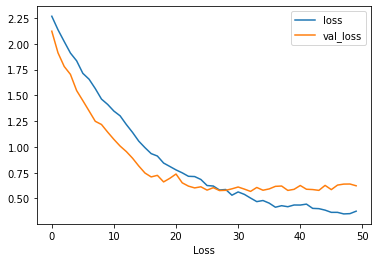

In [ ]:

# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.xlabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

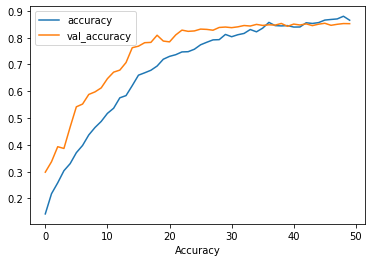

In [ ]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.xlabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Evaluate the performance
model.evaluate(X_test, y_test)

82/82 [==============================] - 4s 42ms/step - loss: 0.6820 - accuracy: 0.8416


[0.6820419430732727, 0.8416030406951904]

In [ ]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_train[0].reshape(1, 250, 187, 1))

# Print the prediction result
prediction_result

array([[7.9131196e-06, 6.0633263e-09, 1.3131215e-06, 2.4862116e-05,
        9.9429411e-01, 5.2063177e-07, 1.2341166e-06, 5.6645847e-03,
        3.5743105e-07, 5.1326037e-06]], dtype=float32)

In [ ]:
# Find the predicted class
predicted_class = prediction_result.argmax() # integer
# Find the prediction probability
predicted_probability = prediction_result.max()

In [ ]:
# to see the category name
CATEGORIES = { 0 : "air_conditioner" ,
               1 : "car_horn",
               2 : "children_playing",
               3 : "dog_bark" ,
               4 : "drilling" ,
               5 : "engine_idling" ,
               6 : "gun_shot" ,
               7 : "jackhammer" ,
               8 : "siren",
               9 : "street_music" }

predicted_class = CATEGORIES[predicted_class] # now it is string

In [ ]:
# Print the results
print(f"This image belongs to the class of '{predicted_class}' with {predicted_probability} probability %")

This image belongs to the class of 'drilling' with 0.9942941069602966 probability %
